### SVM代码实现

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
importlib.reload(sys)

<module 'sys' (built-in)>

In [10]:
import xlrd # 导入库
from numpy import *
import matplotlib as mpls
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
# 打开文件
xlsx = xlrd.open_workbook("C://Users/Administrator/Desktop/python/数据集合.xls")
print ("All sheets: %s’%xlsx.sheet_names")
sheet1 = xlsx.sheets()[0] #获得第一张sheet，索引从0开始

sheet1_name = sheet1.name # 获得名称

sheet1_cols = sheet1.ncols # 获得列数

sheet1_nrows = sheet1.nrows # 获得行数

print (("Sheet1 Name: %s Sheet1 cols: %s Sheet1 rows: %s’")%(sheet1_name, sheet1_cols, sheet1_nrows))

print ("===================================") # 内容分割线
sheet1 = xlsx.sheets()[0] #获得第一张sheet，索引从0开始

sheet1_name = sheet1.name # 获得名称

sheet1_cols = sheet1.ncols # 获得列数

sheet1_nrows = sheet1.nrows # 获得行数
dataMat = []
labelMat = []
c=10
#for i in range(sheet1_nrows-1): # 逐行打印sheet1数据
 #dataMat= np.array(sheet1.row_values(c))

#labelMat=dataMat
#print("标签=",labelMat)
for i in range(sheet1_cols): # 逐列打印sheet1数据
 dataMat.append(sheet1.col_values(i))
np.array(dataMat)
#print(dataMat)
#s= np.array(sheet1.row_values(c))
for i in range(20):
 labelMat.append(1)
for i in range(20):
 labelMat.append(0)
for i in range(20):
 labelMat.append(-1)

#print("标签=",labelMat)

All sheets: %s’%xlsx.sheet_names
Sheet1 Name: dayuanye Sheet1 cols: 60 Sheet1 rows: 1501’


In [11]:
#dataMat

### 画散点图

NameError: name 'mpl' is not defined

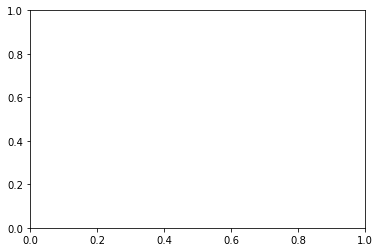

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(array(dataMat)[:,0],array(dataMat)[:,1],c=array(labelMat).squeeze(),cmap=cm_dark,s=30)

### alpha的选取，随机选择一个不等于i值的j

In [ ]:
def selectJrand(i,m):
    j=i
    while (j==i):
        j = int(random.uniform(0,m))
    return j

### 进行剪辑

<img src="images/01.png" align="left" width="300" />

In [ ]:
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

### SMO算法的核心实现
<img src="images/02.png" align="left" width="250" />
<img src="images/03.png" align="left" width="250" />
<img src="images/04.png" align="left" width="250" />

In [ ]:
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    #初始化b为0
    b = 0; 
    #获取数据维度
    m,n = shape(dataMatrix)
    #初始化所有alpha为0
    alphas = mat(zeros((m,1)))
    iter = 0
    #迭代求解
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #计算g(xi)
            gXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            #计算Ei
            Ei = gXi - float(labelMat[i])
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择一个待优化的alpha（先随机出alpha下标）
                j = selectJrand(i,m)
                #计算g(xj)
                gXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                #计算Ej
                Ej = gXj - float(labelMat[j])
                #把原来的alpha值复制，作为old值
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #计算上下界
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                #计算eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                #计算alpha[j]，为了和公式对应把j看出2
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #剪辑alpha[j]，为了和公式对应把j看出2
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); continue
                #计算alpha[i] ，为了和公式对应把j看出1
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #计算b1
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                #计算b2
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #求解b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print("iteration number: %d" % iter)
    return b,alphas

### 计算w
<img src="images/05.png" align="left" width="250" />

In [ ]:
def calcWs(alphas,dataArr,classLabels):
    X = mat(dataArr); labelMat = mat(classLabels).transpose()
    m,n = shape(X)
    #初始化w都为1
    w = zeros((n,1))
    #循环计算
    for i in range(m):
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

### 调用上述方法，求解w，b，alpha

In [ ]:
b,alphas = smoSimple(dataMat,labelMat,0.6,0.001,40)
w = calcWs(alphas,dataMat,labelMat)
print('b=',b)
print('alphas=',alphas)
print('w=',w)

### 画决策平面

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(array(dataMat)[:,0],array(dataMat)[:,1],c=array(labelMat).squeeze(),cmap=cm_dark,s=30)

x = arange(-1.0, 1.0, 0.01)
y = (-w[0]*x - b)/w[1]
ax.plot(x,y.reshape(-1,1))
ax.axis([-2,12,-8,6])
plt.show()

### 画支持向量

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(array(dataMat)[:,0],array(dataMat)[:,1],c=array(labelMat).squeeze(),cmap=cm_dark,s=30)

x = arange(-2.0, 12.0, 0.1)
y = (-w[0]*x - b)/w[1]
ax.plot(x,y.reshape(-1,1))
ax.axis([-2,12,-8,6])


alphas_non_zeros_index = where(alphas>0)
for i in alphas_non_zeros_index[0]:
    circle = Circle((dataMat[i][0], dataMat[i][1]), 0.2, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()